In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e23/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e23/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67842 entries, 0 to 67841
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 67842 non-null  int64  
 1   loc                67842 non-null  float64
 2   v(g)               67842 non-null  float64
 3   ev(g)              67842 non-null  float64
 4   iv(g)              67842 non-null  float64
 5   n                  67842 non-null  float64
 6   v                  67842 non-null  float64
 7   l                  67842 non-null  float64
 8   d                  67842 non-null  float64
 9   i                  67842 non-null  float64
 10  e                  67842 non-null  float64
 11  b                  67842 non-null  float64
 12  t                  67842 non-null  float64
 13  lOCode             67842 non-null  int64  
 14  lOComment          67842 non-null  int64  
 15  lOBlank            67842 non-null  int64  
 16  locCodeAndComment  678

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,101763.0,50881.000000,29376.592059,0.0,25440.50,50881.00,76321.50,101762.00
loc,101763.0,37.347160,54.600401,1.0,13.00,22.00,42.00,3442.00
v(g),101763.0,5.492684,7.900855,1.0,2.00,3.00,6.00,404.00
ev(g),101763.0,2.845022,4.631262,1.0,1.00,1.00,3.00,165.00
iv(g),101763.0,3.498826,5.534541,1.0,1.00,2.00,4.00,402.00
n,101763.0,96.655995,171.147191,0.0,25.00,51.00,111.00,8441.00
v,101763.0,538.280956,1270.791601,0.0,97.67,232.79,560.25,80843.08
l,101763.0,0.111634,0.100096,0.0,0.05,0.09,0.15,1.00
d,101763.0,13.681881,14.121306,0.0,5.60,9.82,18.00,418.20
i,101763.0,27.573007,22.856742,0.0,15.56,23.36,34.34,569.78


In [6]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,67842.0,135683.500000,19584.442818,101763.0,118723.25,135683.50,152643.7500,169604.00
loc,67842.0,37.855945,55.793918,1.0,13.00,22.00,42.0000,1891.00
v(g),67842.0,5.559462,8.237389,1.0,2.00,3.00,6.0000,470.00
ev(g),67842.0,2.857699,4.666370,1.0,1.00,1.00,3.0000,165.00
iv(g),67842.0,3.535715,5.339085,1.0,1.00,2.00,4.0000,402.00
n,67842.0,98.222178,179.123492,0.0,25.00,51.00,111.0000,8441.00
v,67842.0,548.422497,1318.416828,0.0,96.21,232.79,560.2500,80843.08
l,67842.0,0.111521,0.100840,0.0,0.04,0.09,0.1400,1.00
d,67842.0,13.762472,14.487425,0.0,5.50,9.82,18.0000,418.20
i,67842.0,27.635377,23.420521,0.0,15.54,23.23,34.2700,569.78


In [7]:

train = train.drop("id", axis=1)
test_id = test["id"]
test = test.drop("id", axis=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
cols_to_scale = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

In [10]:
scaler = MinMaxScaler()

train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])
test[cols_to_scale] = scaler.fit_transform(test[cols_to_scale])


In [11]:
y_train = train["defects"]
x_train = train.drop("defects", axis=1)

In [12]:
len(x_train.columns)

21

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define your deep learning classifier model
model = keras.Sequential()

model.add(layers.Dense(256,input_shape=(21,), activation='relu'))


model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',  # You can choose other optimizers like SGD, RMSprop, etc.
              loss='binary_crossentropy',  # For multi-class classification
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5632      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20)


Epoch 1/20
1591/1591 [==============================] - 7s 4ms/step - loss: 0.4466 - accuracy: 0.8068
Epoch 2/20
1591/1591 [==============================] - 6s 4ms/step - loss: 0.4374 - accuracy: 0.8111
Epoch 3/20
1591/1591 [==============================] - 6s 3ms/step - loss: 0.4353 - accuracy: 0.8124
Epoch 4/20
1591/1591 [==============================] - 6s 3ms/step - loss: 0.4348 - accuracy: 0.8134
Epoch 5/20
1591/1591 [==============================] - 6s 3ms/step - loss: 0.4337 - accuracy: 0.8130
Epoch 6/20
1591/1591 [==============================] - 6s 4ms/step - loss: 0.4332 - accuracy: 0.8133
Epoch 7/20
1591/1591 [==============================] - 6s 4ms/step - loss: 0.4331 - accuracy: 0.8133
Epoch 8/20
1591/1591 [==============================] - 6s 4ms/step - loss: 0.4324 - accuracy: 0.8136
Epoch 9/20
1591/1591 [==============================] - 6s 3ms/step - loss: 0.4323 - accuracy: 0.8139
Epoch 10/20
1591/1591 [==============================] - 6s 4ms/step - loss: 0.432

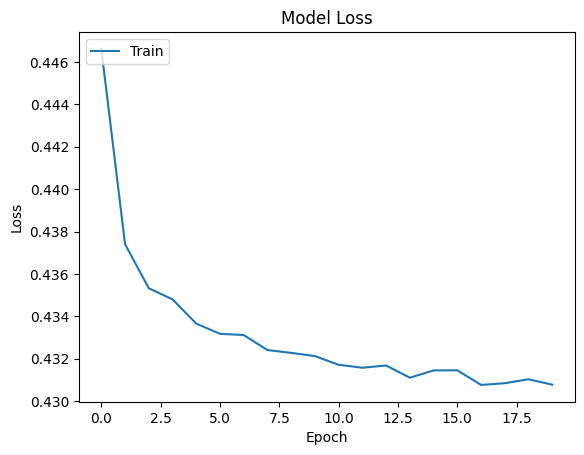

In [15]:

import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history in a variable called 'history'
# history = model.fit(x_train, y_train, batch_size=64, epochs=10)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [16]:

output = model.predict(test)

2121/2121 [==============================] - 3s 1ms/step


In [17]:
threshold = 0.5

# Convert probabilities to binary values
binary_array = (output >= threshold).astype(int)

In [18]:
submission_df = pd.DataFrame({"id": test_id, "defects": binary_array[:, 0]})
submission_df.to_csv("submission.csv", index=False)